In [1]:
# coding: utf-8    #  par défaut l'encoding est en utf-8 pour python 3

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import re
import scipy.stats as st
import time
from math import *
from sklearn import preprocessing
import seaborn
import seaborn as sns
# from sklearn import decomposition
# import statsmodels.api as sm
# import statsmodels.formula.api as smf



In [2]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

pd.set_option('display.max_row', 2000)
pd.set_option('display.max_column', 300)
pd.set_option('display.column_space', 200)
pd.set_option('display.width', 10000)

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 20

<IPython.core.display.Javascript object>

### Suite du projet avec 'GHGEmissionsCO2'


In [4]:
energy_2016 = pd.read_csv("energy_2016.csv")
energy_2016.head(3)


,Unnamed: 0,Latitude,Longitude,age,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse,GHGEmissionsCO2,PercentParking,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_,LargestPropertyUseType_Adult Education,LargestPropertyUseType_Automobile Dealership,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_College/University,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Fire Station,LargestPropertyUseType_Fitness Center/Health Club/Gym,LargestPropertyUseType_Food Service,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Library,LargestPropertyUseType_Lifestyle Center,LargestPropertyUseType_Manufacturing/Industrial Plant,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Movie Theater,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Museum,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_,SecondLargestPropertyUseType_Adult Education,SecondLargestPropertyUseType_Automobile Dealership,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Courthouse,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Enclosed Mall,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Fitness Center/Health Club/Gym,SecondLargestPropertyUseType_Food Sales,SecondLargestPropertyUseType_Food Service,SecondLargestPropertyUseType_Hospital (General Medical & Surgical),SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPro

## Régression avec GHGEmissionsCO2

In [5]:
list_col_X = energy_2016.columns.tolist()

# Enlever de list_col_X les 3 variables expliquées :  'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2'
list_col_X.remove('ENERGYSTARScore')
list_col_X.remove('SiteEnergyUse')
list_col_X.remove('GHGEmissionsCO2')


In [6]:
from sklearn.model_selection import train_test_split

X = energy_2016[list_col_X]
y = energy_2016['GHGEmissionsCO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)   # Même dataset


### Régression ridge

In [7]:
# Calcul de la baseline 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge

# On va tester un coefficient alpha= 0 afin de trouver la baseline =  MSE :
ridge = linear_model.Ridge()
ridge.set_params(alpha=0.00000001)
ridge.fit(X_train, y_train)

mse = np.mean((ridge.predict(X_test) - y_test) ** 2)    # MSE
print("BASELINE = MSE =", mse)
baseline_error =  mse


BASELINE = MSE = 1.1478821940803343


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.34828e-18): result may not be accurate.
  overwrite_a=True).T


In [8]:
# Application de la régression ridge:  On doit trouver un coefficient de régularisation adapté.

from sklearn.linear_model import Ridge


# On va tester un certain nombre de coefficients alpha afin de trouver celui qui est optimal.
n_alphas = 150
alphas = np.logspace(-4, 3, n_alphas)    # => de 10^-4 à 10^3

# Teste de la régression Ridge avec différentes valeur de l'hyperparamètre α.  
#   On récupère les poids des différents coefficients (coefs[]) de la régression ainsi que l'erreur quadratique (errors[]).

ridge = linear_model.Ridge()

coefs  = []
errors = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)                                        # liste de coefs pour une valeur de alpha
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))    # MSE


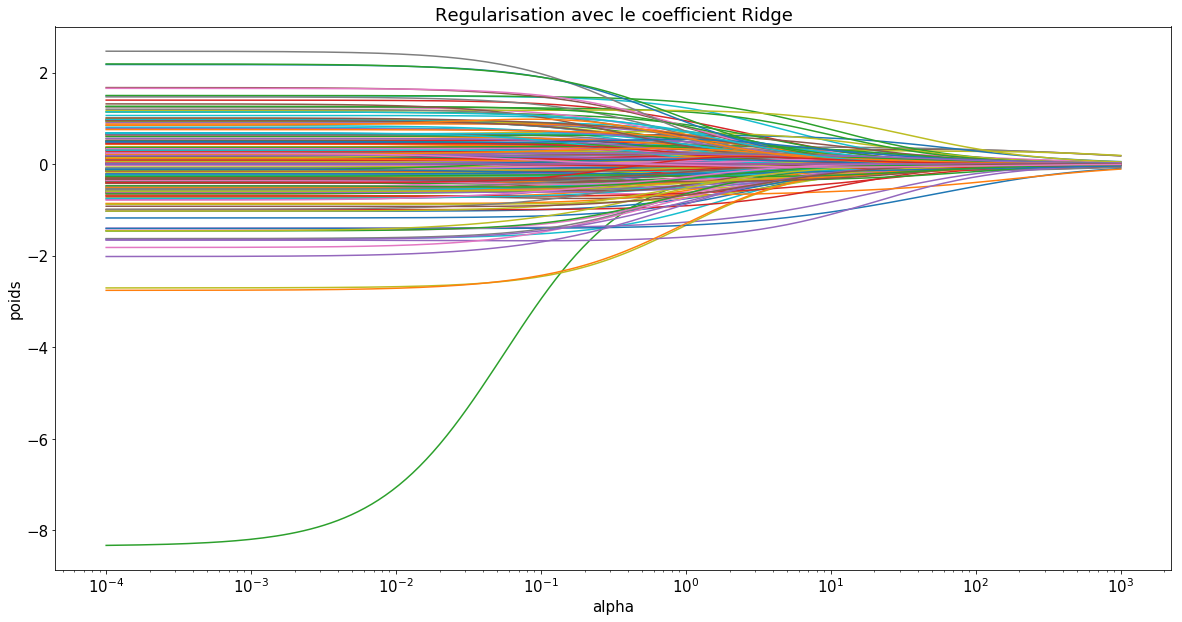

In [9]:
# Evolution de la valeur des différents poids (coef) associés aux paramètres :  Chemin de régularisation

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Regularisation avec le coefficient Ridge')
plt.axis('tight')
plt.savefig( "ridge1bis.png", dpi=50 )
plt.show()


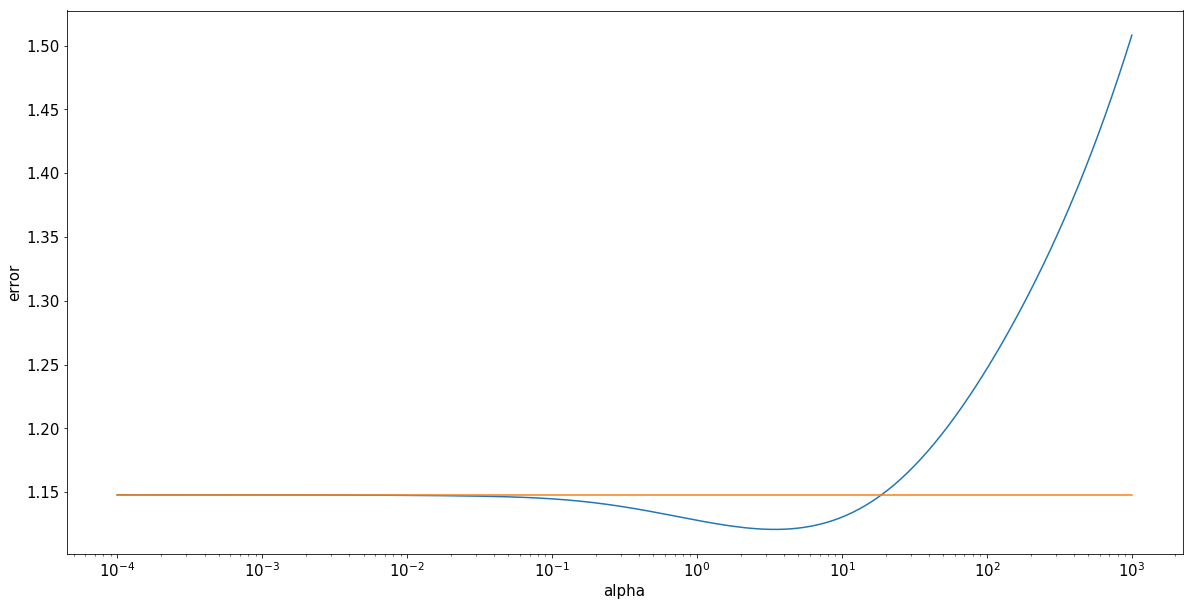

Meilleur paramètre alpha de régularisation =  3.6061765077612336
Meilleur score MSE =  1.120820972051486
Baseline MSE       =  1.1478821940803343


In [10]:
# Evolution de la MSE en fonction de alpha en la comparant à la baseline :

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, errors, [10**-4, 10**3], [baseline_error, baseline_error])   # 2 courbes :  x1,y1 , 2x,y2
# ax.plot(alphas, errors)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.savefig( "ridge2bis.png", dpi=50 )
plt.show()

alpha_opt = alphas[np.argmin(errors) ]    
# = 3.6061765077612336  <- ce param de régularisation a permis de diminuer l'erreur quadratique

print("Meilleur paramètre alpha de régularisation = ", alpha_opt)
print("Meilleur score MSE = ", errors[np.argmin(errors)])
print("Baseline MSE       = ", baseline_error)


In [11]:
# Version automatique :  Recherche automatique de l'hyperparamètre α.

from sklearn.linear_model import RidgeCV

n_alphas = 150
alphas = np.logspace(-4, 3, n_alphas)    # => de 10^-4 à 10^3

ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

r2  = ridge.score(X_test, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test))

print("R2  =", r2)                                     # Coef. de détermination R2
print("MSE =", mse)
print("\nMeilleur alpha =", ridge.alpha_)
# ridge.coef_   # liste de coefs pour une valeur de alpha

# R2  = 0.5162836234317394
# MSE = 1.1234492173369441
# Meilleur alpha = 6.193644990970618


R2  = 0.5162836234317394
MSE = 1.1234492173369441

Meilleur alpha = 6.193644990970618


### Régression Lasso

In [13]:
# Application de la régression Lasso:  On doit trouver un coefficient de régularisation adapté.

from sklearn.linear_model import Lasso


# On va tester un certain nombre de coefficients alpha afin de trouver celui qui est optimal.
n_alphas = 120
alphas = np.logspace(-4, 2, n_alphas)    # => de 10^-4 à 10^2

lasso = linear_model.Lasso()

coefs  = []
errors = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)                                        # liste de coefs pour une valeur de alpha
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))    # MSE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 497.83819535585314, tolerance: 0.28786420896851433
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494.7506554368173, tolerance: 0.28786420896851433
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.2667574350432, tolerance: 0.28786420896851433
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

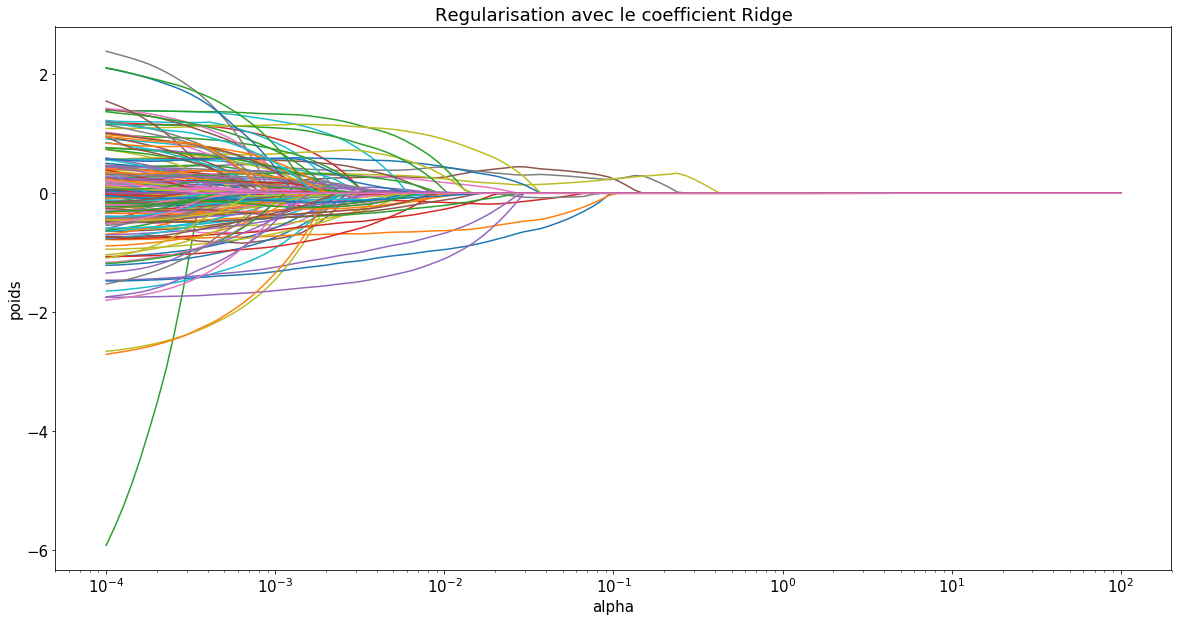

In [22]:
# Evolution de la valeur des différents poids (coef) associés aux paramètres :  Chemin de régularisation

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Regularisation avec le coefficient Ridge')
plt.axis('tight')
plt.savefig( "lasso1bis.png", dpi=50)
plt.show()

# Les poids des différents paramètres évolue en fonction du coef de régularisation alpha.
# Comme on peut le voir, lorsque la valeur de alpha augmente, les poids de tous les paramètres de la régression diminuent. 

# Autour de 10-2, là ou la régularisation est la plus intéressante. A ce point là beaucoup de coef s'annule et 
#   une poignée d'entre eux garde une valeur non nulle.


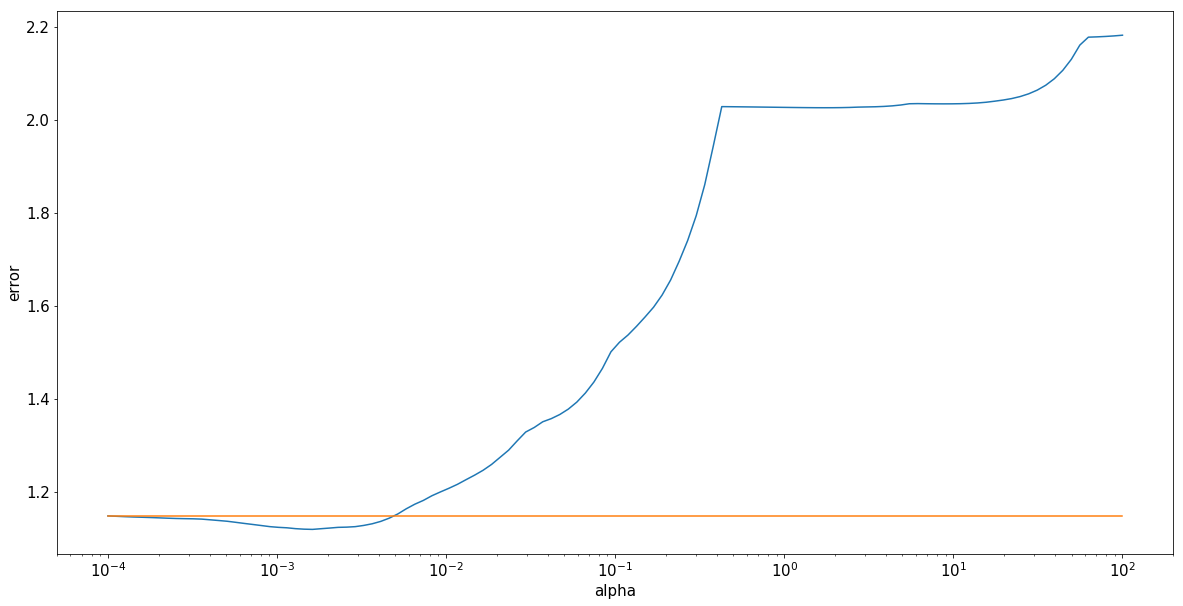

Meilleur paramètre alpha de régularisation =  0.001622123939129173
Meilleur score MSE =  1.119261633301439


In [23]:
# Evolution de la MSE en fonction de alpha en la comparant à la baseline :

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, errors, [10**-4, 10**2], [baseline_error, baseline_error])   # 2 courbes :  x1,y1 , 2x,y2
# ax.plot(alphas, errors)   # 2 courbes :  x1,y1 , 2x,y2

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.savefig( "lasso2bis.png", dpi=50)
plt.show()

# Le graphique nous montre que la régularisation diminue l'erreur sur le jeu de données test.
# Dans l'intervalle de alpha [10-2;10-3] , le minimum d'erreur semble se trouver pour la régression lasso. 

# On peut récupérer la valeur de alpha pour lequel l'erreur quadratique est minime :
alpha_opt = alphas[np.argmin(errors)]

print("Meilleur paramètre alpha de régularisation = ", alpha_opt)
print("Meilleur score MSE = ", errors[np.argmin(errors)])


In [14]:
# Version automatique :

from sklearn.linear_model import LassoCV

n_alphas = 150
alphas = np.logspace(-4, 3, n_alphas)    # => de 10^-4 à 10^3

lasso = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)

r2  = lasso.score(X_test, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test))

print("R2  =", r2)
print("MSE =", mse)
print("\nMeilleur alpha =", lasso.alpha_)

# R2  = 0.5146334042493472
# MSE = 1.1272819125664206
# Meilleur alpha = 0.0031868065762459103


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2544538579281834, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7366938448992641, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4837932870906343, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

R2  = 0.5146334042493472
MSE = 1.1272819125664206

Meilleur alpha = 0.0031868065762459103


In [114]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.5162836234317394   1.1234492173369441     (Meilleur alpha = 6.193644990970618)
# Lasso       0.5146334042493472   1.1272819125664206     (Meilleur alpha = 0.0031868065762459103)



### Application d'ElasticNet

In [12]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


elastic = ElasticNet(fit_intercept= False)
search = GridSearchCV(estimator=elastic, 
                      param_grid={'alpha':np.logspace(-4, 3, 100), 'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=5)            # MSE
                      #scoring='r2', n_jobs=1, refit=True, cv=5)                               # R2

search.fit(X_train, y_train)

print("Meilleurs paramètres :", search.best_params_)
print("Meilleur MSE :", abs(search.best_score_))
# model = search.best_estimator_    # Sauvegarde du meilleur modele
print("Meilleur R2  :", search.best_estimator_.score(X_test, y_test))

# Meilleurs paramètres : {'alpha': 0.0042292428743894986, 'l1_ratio': 0.8}
# Meilleur MSE : 1.1693000576702852
# Meilleur R2  : 0.5123472636441102
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432.4884197345484, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433.3473651227923, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442.539633709378, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435.5834896119674, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444.2670962755359, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448.8879092004742, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.50515715225833, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.5378917343514, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.487578106366, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.5380219476254, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473.37243500020384, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443.4799444415062, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.14990569533785, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451.31443741815497, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452.48434530915586, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.4702043806213, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459.72760694843623, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.9302197415075, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470.69536903270387, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.36872189267353, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487.53207377626336, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453.2160361261448, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.2702016661463, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465.67790808420955, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474.47963142255486, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.29253700067574, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.13754750713144, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.7933103698024, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.778029708432, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485.7761611661912, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.7397474052643, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506.00306508497215, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.73914521159134, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482.74066835097295, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.1316207309405, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499.8753860996954, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.1978399130029, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530.9569324336562, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.94142063003534, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520.4129810413054, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534.4546124046934, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518.1979194649683, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511.821402733994, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530.9016209447663, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.4586242642273, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550.1529120806076, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564.6548384835785, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543.566908576419, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566.6241334124252, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550.9557842658328, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.3361135481289, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546.8084176506442, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552.4780484284368, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565.4624585346534, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590.0027538794305, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 569.5107464144933, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592.1350076024446, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 579.2243047079567, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.6359640419454, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597.0985338134155, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577.4073058176964, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 595.4947309204014, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.3954757253393, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589.8595378641608, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582.9179562811098, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599.9100985989434, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624.3887472339519, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.0787457611617, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605.7256137462962, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528.0527960827558, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540.458971875421, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607.6060864319793, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.8028024587164, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506.47254029948806, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519.5409993963207, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602.8946389783232, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.6612221117351, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559.3469163036355, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.2092764011738, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326.500115598208, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.94411590830146, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.81141349967004, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.15457713344756, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.4788443604748, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547.1673817894415, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.9774432113811, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536.8373452831632, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.34867376429997, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193.03884574657138, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.83154313087516, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.7597351705781, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238.6756198389195, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.27157627649535, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6569308763475874, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.32911799453336, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.19008178177012, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.491902036943884, tolerance: 1.7293884845731955
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.14176646427177, tolerance: 1.7155658557903917
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.773018552176836, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.60098911271325, tolerance: 1.741677137352118
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.54175540340907, tolerance: 1.7204014733697577
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.13214552233876, tolerance: 1.7265868613747437
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Meilleurs paramètres : {'alpha': 0.0042292428743894986, 'l1_ratio': 0.8}
Meilleur MSE : 1.1693000576702852
Meilleur R2  : 0.5123472636441102


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697.4688427914639, tolerance: 2.158404953115052
  positive)


In [13]:
from sklearn.linear_model import ElasticNetCV

n_alphas = 200
alphas = np.logspace(-4, 3, n_alphas)

elastic = ElasticNetCV(alphas=alphas, l1_ratio=[.8 , .9, 1.0 , 1.1, 1.5, 1.6, 1.7, 1.8, 2.0], cv=5).fit(X_train, y_train)

r2  = elastic.score(X_test, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test))

print("R2  =", r2)
print("MSE =", mse)
print("Meilleur alpha =", elastic.alpha_)
print("Meilleur ratio =", elastic.l1_ratio_)

# R2  = 0.5144261951873887
# MSE = 1.1277631632946552
# Meilleur alpha = 0.0032550885998350564
# Meilleur ratio  = 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24116950144116345, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7277176120941249, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2528566722128289, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25923006963273565, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2948260516486698, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24287639606632183, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3910403143140684, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23818436206568094, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6861347138773226, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.564703517583439, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.457858616866929, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7240031832851628, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4808596205881486, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase th

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.551790425051195, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.158023382350052, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2819664217769287, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9485145852045207, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 303.8290809025427, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.275170100110131, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.3663455875237105, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.3608477544345305, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.986796504916583, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.539227794140743, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6785501407158563, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8722938045318642, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9467632381123394, tolerance: 0.22641987431274285
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22960606925796878
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.22884130315117737
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1026: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.233113981277876
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.233113981277876
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.233113981277876
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.93541856058937, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.090592765462816, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2873922659684922, tolerance: 0.23339559913544078
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

R2  = 0.5144261951873887
MSE = 1.1277631632946552
Meilleur alpha = 0.0032550885998350564
Meilleur ratio = 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1026: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)


In [15]:
# Utilisation des résultats de 'ElasticNetCV' pour visualiser les coefficients :

from sklearn.linear_model import ElasticNet


best_elastic = ElasticNet(alpha=0.0032550885998350564, l1_ratio=1.0)
best_elastic.fit(X_train, y_train)

print("R2  =", best_elastic.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=best_elastic.predict(X_test)) )

# Pour voir les coefs qui se rapprochent de zéro :
coef_dict_baseline = {}
for coef, feat in zip(best_elastic.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# Présentation des Coefs du plus Grand au plus Petit :    
sorted(coef_dict_baseline.items(), key=lambda t: t[1], reverse=True)


R2  = 0.5144261951873887
MSE = 1.1277631632946552


[('LargestPropertyUseType_Laboratory', 1.12779328388411),
 ('LargestPropertyUseType_Supermarket/Grocery Store', 1.1108519166914053),
 ('LargestPropertyUseType_Restaurant', 0.8203974651018321),
 ('LargestPropertyUseType_Other - Recreation', 0.7131201950792336),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.7103593836708321),
 ('LargestPropertyUseType_Hotel', 0.5576110771054338),
 ('LargestPropertyUseType_Senior Care Community', 0.40299844246422845),
 ('PropertyGFABuildings', 0.3833532614280443),
 ('LargestPropertyUseTypeGFA', 0.3172968026000108),
 ('Neighborhood_EAST', 0.29130468607002213),
 ('SecondLargestPropertyUseType_Restaurant', 0.28125493300768595),
 ('PropertyGFATotal', 0.26555384825872114),
 ('ZipCode_98116.0', 0.16419176057141902),
 ('CouncilDistrictCode_3', 0.09723434120242083),
 ('ZipCode_98102.0', 0.08245427214676881),
 ('ZipCode_98109.0', 0.06264898481377036),
 ('ThirdLargestPropertyUseType_Office', 0.060194302026161564),
 ('LargestPropertyUseType_O

In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.5162836234317394   1.1234492173369441     (Meilleur alpha = 6.193644990970618)
# Lasso       0.5146334042493472   1.1272819125664206     (Meilleur alpha = 0.0031868065762459103)
# ElasticNet  0.5144261951873887   1.1277631632946552     (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)


### Arbre de décision

In [29]:
# L’objectif est de régresser 'GHGEmissionsCO2' à partir des valeurs de X. 
# Recherche des hyper-paramètres :

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

reg = DecisionTreeRegressor()
search = GridSearchCV(estimator=reg, 
                      param_grid={'min_samples_leaf':[10,20,21,22,30], 'max_depth':[3,6,7,8,9,12], 
                                  'min_samples_split':[3,6,7,8,9,12]},
                      scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=5)   # MSE
                      #scoring='r2', n_jobs=1, refit=True, cv=5)                       # R2

search.fit(X_train, y_train)
print("Meilleurs paramètres :", search.best_params_)
print("Meilleur  MSE :", abs(search.best_score_))

model = search.best_estimator_                # Sauvegarde du meilleur modele
print("Meilleur  R2  :", model.score(X_test, y_test))

# Meilleurs paramètres : {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3}
# Meilleur  MSE : 1.5072277737112445
# Meilleur  R2  : 0.37062312606816616


Meilleurs paramètres : {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3}
Meilleur  MSE : 1.5072277737112445
Meilleur  R2  : 0.37062312606816616


In [160]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.5162836234317394   1.1234492173369441     (Meilleur alpha = 6.193644990970618)
# Lasso       0.5146334042493472   1.1272819125664206     (Meilleur alpha = 0.0031868065762459103)
# ElasticNet  0.5144261951873887   1.1277631632946552     (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)
# Arbre de    0.37062312606816616  1.5072277737112445     (max_depth=6, min_samples_leaf=10, min_samples_split=3)
# décision  


### Bagging

In [165]:
# 'base_estimator':  par défaut l’estimateur est un Arbre de Décision
# 'n_estimators'  :  nombre d'instances d’un estimateur
#
# Chaque estimateur utilise au maximum 80% des points pour son apprentissage et la moitié des attributs (features) :
#    - max_samples  : la taille de l’échantillon aléatoire tiré de la base d’apprentissage 'train'.
#    - max_features : le nombre d’attributs tirés aléatoirement.
#

In [31]:
# Pour quelles valeurs des parametres max_samples et max_features,obtient-on le meilleur résultat ?

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

pgrid = {"max_samples": [ 0.9, 0.95, 0.99],
         "max_features": [0.9, 0.95, 0.99],
         "n_estimators": [50, 60, 70, 80, 90]}

search = GridSearchCV(BaggingRegressor(DecisionTreeRegressor()), param_grid=pgrid, cv=5)
search.fit(X_train, y_train)

print("Meilleur R2  = " + str(search.best_estimator_.score(X_test, y_test)))
print("Meilleur MSE = ",mean_squared_error(y_true=y_test, y_pred=search.best_estimator_.predict(X_test)))
print("max_samples : " + str(search.best_estimator_.max_samples))
print("max_features: " + str(search.best_estimator_.max_features))
print("n_estimators: " + str(search.best_estimator_.n_estimators))

# Meilleur R2  = 0.496245818748678
# Meilleur MSE =  1.1699877615723988
# max_samples : 0.95
# max_features: 0.99
# n_estimators: 50
    

Meilleur R2  = 0.496245818748678
Meilleur MSE =  1.1699877615723988
max_samples : 0.95
max_features: 0.99
n_estimators: 50


In [32]:
from sklearn.ensemble import BaggingRegressor

# Ensemble de classifieurs dont le classifieur de base est un 'DecisionTreeRegressor' :
bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators=50, max_samples=0.95, max_features=0.99)
bagging.fit(X_train, y_train)

r2 = bagging.score(X_test, y_test)
print("R2  = ", r2)
print("MSE = ", mean_squared_error(y_true=y_test, y_pred=bagging.predict(X_test)))

# R2  =  0.4962602197896987
# MSE =  1.1699543146207403


R2  =  0.4962602197896987
MSE =  1.1699543146207403


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.5162836234317394   1.1234492173369441     (Meilleur alpha = 6.193644990970618)
# Lasso       0.5146334042493472   1.1272819125664206     (Meilleur alpha = 0.0031868065762459103)
# ElasticNet  0.5144261951873887   1.1277631632946552     (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)
# Arbre de    0.37062312606816616  1.5072277737112445     (max_depth=6, min_samples_leaf=10, min_samples_split=3)
#  décision  
# Bagging     0.496245818748678    1.1699877615723988     (n_estimators=50, max_samples=0.95, max_features=0.99)


### Forêts aléatoires

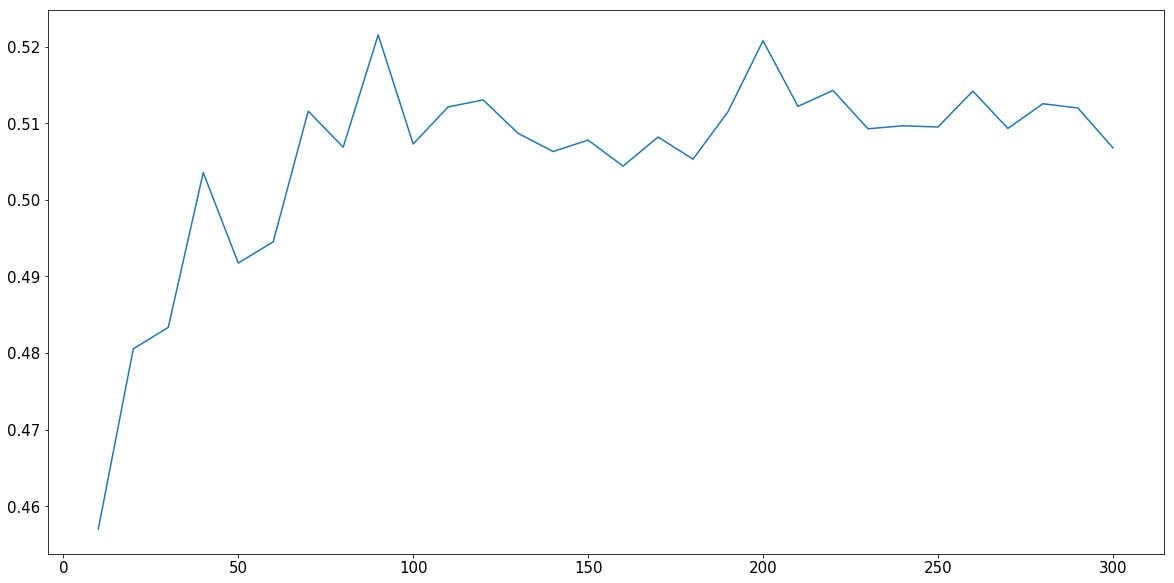

In [33]:
# Construire le graphique R2 vs n_estimators. 
#
#   A partir de quelle valeur de 'n_estimators' on n’améliore plus ?

from sklearn.ensemble import RandomForestRegressor

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

for i in range(N):
    clf = RandomForestRegressor(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.savefig( "foret_al.png", dpi=50)
plt.show()

# A partir de n_estimators = 100,
#   le résultat commence à osciller autour de la moyenne, donc on ne gagne plus rien en augmentant la valeur.


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
   
pgrid = {
          "n_estimators": [80, 90, 100],
          "min_samples_split": [6, 8, 9, 10],
          "max_features": [0.8, 0.9, 0.95, 0.99],
          "max_samples": [0.8, 0.9, 0.95, 0.99],
          "min_samples_leaf": [20, 30, 40]}

search = GridSearchCV(RandomForestRegressor(DecisionTreeRegressor()), param_grid=pgrid, cv=5, n_jobs=4)
search.fit(X_train, y_train)

print("Meilleur R2 : " + str(search.best_estimator_.score(X_test, y_test)))
print("Meilleur MSE = ",mean_squared_error(y_true=y_test, y_pred=search.best_estimator_.predict(X_test)))
print("n_estimators: " + str(search.best_estimator_.n_estimators))
print("min_samples_split: " + str(search.best_estimator_.min_samples_split))
print("max_features: " + str(search.best_estimator_.max_features))
print("max_samples: " + str(search.best_estimator_.max_samples))
print("min_samples_leaf: " + str(search.best_estimator_.min_samples_leaf))

# Meilleur R2 : 0.4424375438863733
# Meilleur MSE =  1.2949594747675932
# n_estimators: 80
# min_samples_split: 10
# max_features: 0.99
# max_samples: 0.99
# min_samples_leaf: 20
    

Meilleur R2 : 0.4424375438863733
Meilleur MSE =  1.2949594747675932
n_estimators: 80
min_samples_split: 10
max_features: 0.99
max_samples: 0.99
min_samples_leaf: 20


In [36]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)  

randomForest = RandomForestRegressor(n_estimators=80, n_jobs=4, max_features=0.99, max_samples=0.99, 
                                     min_samples_leaf=20, min_samples_split=10)
randomForest.fit(X_train, y_train)

r2 = randomForest.score(X_test, y_test)
print("R2  = ", r2)
print("MSE = ",mean_squared_error(y_true=y_test, y_pred=randomForest.predict(X_test)))

# R2  =  0.44563294905458983
# MSE =  1.2875380278015514


R2  =  0.44563294905458983
MSE =  1.2875380278015514


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.5162836234317394   1.1234492173369441     (Meilleur alpha = 6.193644990970618)
# Lasso       0.5146334042493472   1.1272819125664206     (Meilleur alpha = 0.0031868065762459103)
# ElasticNet  0.5144261951873887   1.1277631632946552     (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)
# Arbre de    0.37062312606816616  1.5072277737112445     (max_depth=6, min_samples_leaf=10, min_samples_split=3)
#  décision  
# Bagging     0.496245818748678    1.1699877615723988     (n_estimators=50, max_samples=0.95, max_features=0.99)

# Foret Alea  0.4424375438863733   1.2875380278015514     (n_estimators=80, max_features=0.99, max_samples=0.99,
#                                                          min_samples_leaf=20, min_samples_split=10)


### Boosting

#### AdaBoost

In [192]:
#
# base_estimator :  The base estimator from which the boosted ensemble is built. Default DecisionTreeRegressor(max_depth=3).
# n_estimators   :  default=50
# learning_rate  :  default=1.
# loss           :  The loss function to use when updating the weights after each boosting iteration.
#                      {‘linear’, ‘square’, ‘exponential’}, default=’linear’


In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

params = {'n_estimators': [60, 70, 80],
          'learning_rate' : [0.1, 0.5, 1.0 , 1.5, 2.0],
          'loss' : ['linear', 'square', 'exponential'] }

abreg = AdaBoostRegressor()
search = GridSearchCV(abreg, params, cv=5)
search.fit(X_train, y_train)

ypred = search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("R2: %.2f" % r2)
print("MSE: %.2f" % mse)
print(search.best_params_)
print(search.best_estimator_)

# R2: 0.40
# MSE: 1.40
# {'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 60}
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='exponential',
#                   n_estimators=60, random_state=None)

R2: 0.40
MSE: 1.40
{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 60}
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='exponential',
                  n_estimators=60, random_state=None)


In [38]:
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# AdaBoost basé sur 60 arbres de décision
adaBoost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=60, learning_rate=1.0, loss='exponential')
adaBoost.fit(X_train, y_train)
r2 = adaBoost.score(X_test, y_test)
print("R2 =", r2)
print("MSE = ",mean_squared_error(y_true=y_test, y_pred=adaBoost.predict(X_test)))

# R2 = 0.6962495320027959
# MSE =  0.5422923065773816
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='square',
#                   n_estimators=60, random_state=None)

R2 = 0.4969504523042232
MSE =  1.1683512240168528


#### GradientBoosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

params = {'n_estimators': [50, 60],
          'learning_rate' : [0.1, 0.5, 1.0 , 1.5, 2.0],
          'loss' : ['ls', 'lad', 'huber', 'quantile'] }

gradientBoosting = GradientBoostingRegressor()
search = GridSearchCV(gradientBoosting, params, cv=5)
search.fit(X_train, y_train)

ypred = search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("R2: %.4f" % r2)
print("MSE: %.4f" % mse)
print(search.best_params_)

# R2: 0.4984
# MSE: 1.1649
# {'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 60}
    

R2: 0.4984
MSE: 1.1649
{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 60}


In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

gradientBoosting = GradientBoostingRegressor(n_estimators=60, learning_rate=0.1, loss='ls').fit(X_train, y_train)

print("R2  =", gradientBoosting.score(X_test, y_test))
print("MSE =", mean_squared_error(y_test, gradientBoosting.predict(X_test)))

# R2  = 0.5028155626662076
# MSE = 1.154729287764636


R2  = 0.5028155626662076
MSE = 1.154729287764636


In [445]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.5162836234317394   1.1234492173369441     (Meilleur alpha = 6.193644990970618)
# Lasso       0.5146334042493472   1.1272819125664206     (Meilleur alpha = 0.0031868065762459103)
# ElasticNet  0.5144261951873887   1.1277631632946552     (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)
# Arbre de    0.37062312606816616  1.5072277737112445     (max_depth=6, min_samples_leaf=10, min_samples_split=3)
#  décision  
# Bagging     0.496245818748678    1.1699877615723988     (n_estimators=50, max_samples=0.95, max_features=0.99)
# Foret Alea  0.4424375438863733   1.2875380278015514     (n_estimators=80, max_features=0.99, max_samples=0.99,
#                                                          min_samples_leaf=20, min_samples_split=10)
# AdaBoost    0.40                 1.40                   (n_estimators=60, learning_rate=1.0, loss='exponential')
# GradientBo  0.4984               1.1649                 (n_estimators=60, learning_rate=0.1, loss='ls')




### XGboost

In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

xgboost = XGBRegressor()
params = {'n_estimators': [50, 60],
          'learning_rate' : [0.1, 0.5, 1.0 , 1.5, 2.0],
          'nthread':[4], #when use hyperthread, xgboost may become slower
          'objective':['reg:linear'],
          'max_depth': [5, 6, 7],
          'min_child_weight': [4],
          'subsample': [0.7],
          'colsample_bytree': [0.7]}

search = GridSearchCV(xgboost, params, cv=5, n_jobs=4)
search.fit(X_train, y_train)

ypred = search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("R2: %.4f" % r2)
print("MSE: %.4f" % mse)
print(search.best_params_)

# R2: 0.4989
# MSE: 1.1637
# {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 60, 
#  'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


[01:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.4989
MSE: 1.1637
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 60, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


In [42]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


xgbr = XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=60, 
                    nthread=4, objective='reg:linear', subsample=0.7)
xgbr.fit(X_train, y_train)

print("R2  =", xgbr.score(X_test, y_test))
print("MSE =", mean_squared_error(y_test, xgbr.predict(X_test)))

# R2  = 0.4989385241399448
# MSE = 1.1637338534748491


[01:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R2  = 0.4989385241399448
MSE = 1.1637338534748491


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.516                1.123                  (Meilleur alpha = 6.1936)
# Lasso       0.514                1.127                  (Meilleur alpha = 0.0031)
# ElasticNet  0.514                1.127                  (Meilleur alpha = 0.0032,  Meilleur ratio = 1.0)
# Arbre de    0.370                1.507                  (max_depth=6, min_samples_leaf=10, min_samples_split=3)
#  décision  
# Bagging     0.496                1.169                  (n_estimators=50, max_samples=0.95, max_features=0.99)
# Foret Alea  0.442                1.287                  (n_estimators=80, max_features=0.99, max_samples=0.99, min_samples_leaf=20, min_samples_split=10)
# AdaBoost    0.40                 1.40                   (n_estimators=60, learning_rate=1.0, loss='exponential')
# GradientBo  0.498                1.164                  (n_estimators=60, learning_rate=0.1, loss='ls')

# xgboost     0.498                1.163                  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 60, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}



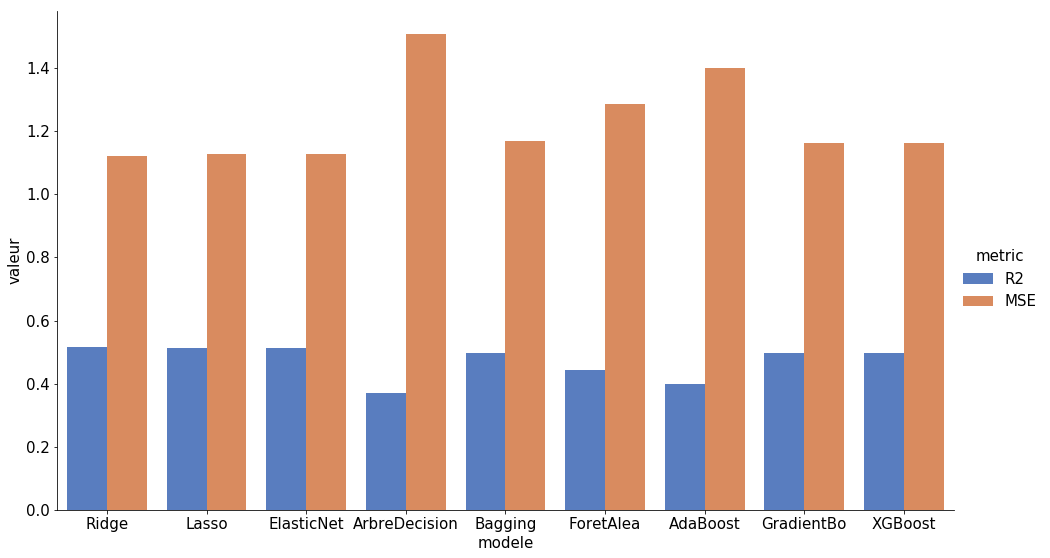

In [25]:
import seaborn as sns

# seaborn.catplot
figure_name = 'results_co2.png'

results = pd.DataFrame({'modele': ['Ridge','Lasso','ElasticNet','ArbreDecision','Bagging','ForetAlea','AdaBoost','GradientBo','XGBoost','Ridge','Lasso','ElasticNet','ArbreDecision','Bagging','ForetAlea','AdaBoost','GradientBo','XGBoost'],
                        'metric': ['R2','R2','R2','R2','R2','R2','R2','R2','R2', 'MSE','MSE','MSE','MSE','MSE','MSE','MSE','MSE','MSE'],
                        'valeur':  [0.516, 0.514, 0.514, 0.370, 0.496, 0.442, 0.40, 0.498, 0.498, 1.123, 1.127, 1.127, 1.507, 1.169, 1.287, 1.40, 1.164, 1.163]})

# sns.catplot(x='modele', y='valeur', hue='metric', data=results, kind='bar')
results_plot = sns.catplot(x='modele', y='valeur', hue='metric', data=results, kind='bar',  
                           height=8, aspect=1.7, palette="muted", legend_out=True)

results_plot.fig.savefig(figure_name)  


### Sélection des Features

In [201]:
Choix du modèle 'ElasticNet' dont le modèle a été enregistré sous 'elastic2'


226

In [ ]:
# Si on a peu de features, on pourrait les afficher sur un histogramme afin d'évaluer à l'œil,
#   si il n'y a pas déjà une sélection à faire comme ici :

#  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet

X = energy_2016[list_col_X]
y = energy_2016['GHGEmissionsCO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]   # Seuil
seuils  = []
rdeux = []

for th in thresholds:

    select = SelectFromModel(best_elastic, prefit=True, threshold=th)
    X_train2 = select.transform(X_train)                           # élimination des variables < th
    X_test2 = select.transform(X_test)                             # élimination des variables < th

    elastic = ElasticNet(alpha=0.0013354515629298987, l1_ratio=1.7)
    elastic.fit(X_train2, y_train)

    r2 = elastic.score(X_test2, y_test)
    print("\nPour un Seuil de ", th,  ":")
    print("Il reste ", X_train2.shape[1],"colonnes")
    print("R2  =", r2)
    print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test2)) )

    rdeux.append(r2)  
    seuils.append(th)

#  Seuil   R2       MSE        nbColonnes
#  ---------------------------------------
#  0.3     0.5028   1.1547     18            => On conserve le seuil de 0.5
#  0.4     0.1819   1.9000     13
#  ---------------------------------------



Pour un Seuil de  0.01 :
Il reste  51 colonnes
R2  = 0.5139401278595443
MSE = 1.1288920726834875

Pour un Seuil de  0.02 :
Il reste  47 colonnes
R2  = 0.513254431955985
MSE = 1.130484626840223

Pour un Seuil de  0.03 :
Il reste  45 colonnes
R2  = 0.5141322334123537
MSE = 1.1284459004151823

Pour un Seuil de  0.04 :
Il reste  43 colonnes
R2  = 0.5130149892644131
MSE = 1.1310407413682277

Pour un Seuil de  0.05 :
Il reste  41 colonnes
R2  = 0.5133805996889846
MSE = 1.1301915976029306

Pour un Seuil de  0.06 :
Il reste  39 colonnes
R2  = 0.5138036352200838
MSE = 1.1292090818988092

Pour un Seuil de  0.07 :
Il reste  36 colonnes
R2  = 0.5103749658241127
MSE = 1.137172293681587

Pour un Seuil de  0.08 :
Il reste  35 colonnes
R2  = 0.509333223278067
MSE = 1.13959177936517

Pour un Seuil de  0.09 :
Il reste  34 colonnes
R2  = 0.5101402701550112
MSE = 1.1377173830739185

Pour un Seuil de  0.1 :
Il reste  33 colonnes
R2  = 0.5081095894627774
MSE = 1.1424337142648047

Pour un Seuil de  0.2 :
Il

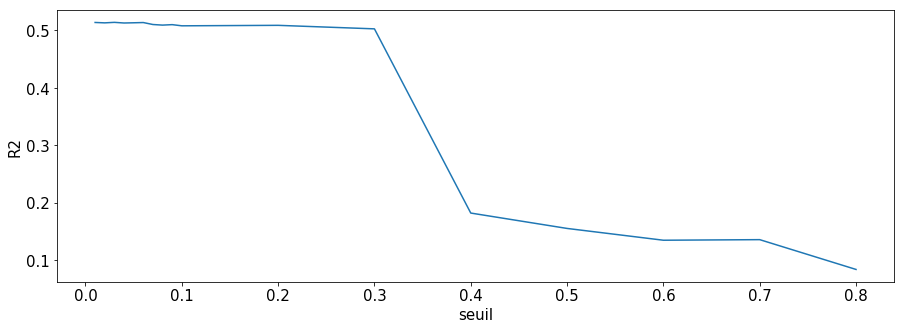

In [17]:
# Affichage du R2 en fonction du seuil imposé :

fig = plt.figure(figsize = (15, 5))   # largeur,hauteur

ax = plt.gca()
ax.plot(seuils, rdeux)

plt.xlabel('seuil')
plt.ylabel('R2')
plt.axis('tight')
plt.savefig( "seuil.png", dpi=50 )
plt.show()


In [18]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# ElasticNet  0.5144               1.1277                 (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)

# th= 0.3     0.5028               1.1547                 18 colonnes



In [19]:
# Choix du seuil de 0.3 qui laisse 18 colonnes

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

th = 0.3   # Seuil

select = SelectFromModel(best_elastic, prefit=True, threshold=th)
X_train2 = select.transform(X_train)

elastic = ElasticNet(alpha=0.0032550885998350564, l1_ratio=1.0)
elastic.fit(X_train2, y_train)

X_test2 = select.transform(X_test)   # X_test doit lui aussi être dégraissé des colonnes inutiles

r2 = elastic.score(X_test2, y_test)
print("\nPour un Seuil de ", th,  ":")
print("Il reste ", X_train2.shape[1],"colonnes")
print("R2  =", r2)
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test2)) )

# select.estimator.coef_



Pour un Seuil de  0.3 :
Il reste  18 colonnes
R2  = 0.5026557977029233
MSE = 1.1551003478148103


#### liste des colonnes conservées

In [20]:
selected_columns = X.columns[select.get_support()]
print("Colonnes sélectionnées :\n", selected_columns)
# select.estimator.coef_

# Nouveau dataframe d'après la liste des colonnes conservées :
X2 = X[selected_columns.tolist()]
X2_starScore = pd.concat([X2, energy_2016['ENERGYSTARScore']], axis = 1)   # # Ajout de la colonne 'ENERGYSTARScore'
X2_starScore.head(2)


Colonnes sélectionnées :
 Index(['PropertyGFABuildings', 'LargestPropertyUseTypeGFA', 'LargestPropertyUseType_Distribution Center', 'LargestPropertyUseType_Hospital (General Medical & Surgical)', 'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_Laboratory', 'LargestPropertyUseType_Multifamily Housing', 'LargestPropertyUseType_Non-Refrigerated Warehouse', 'LargestPropertyUseType_Office', 'LargestPropertyUseType_Other - Recreation', 'LargestPropertyUseType_Parking', 'LargestPropertyUseType_Restaurant', 'LargestPropertyUseType_Retail Store', 'LargestPropertyUseType_Self-Storage Facility', 'LargestPropertyUseType_Senior Care Community', 'LargestPropertyUseType_Supermarket/Grocery Store', 'SecondLargestPropertyUseType_', 'SecondLargestPropertyUseType_Parking'], dtype='object')


,PropertyGFABuildings,LargestPropertyUseTypeGFA,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Parking,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_,SecondLargestPropertyUseType_Parking,ENERGYSTARScore
0,11.390012,11.390012,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.745967
1,11.390780,11.337142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.810250


In [21]:
print(X2_starScore.shape)
print(y.shape)


(1524, 19)
(1524,)


In [22]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X2_starScore, y, test_size=0.2, random_state=5)

elastic = ElasticNet(alpha=0.0032550885998350564, l1_ratio=1.0)
elastic.fit(X_train, y_train)
print("R2  =", elastic.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test)))


R2  = 0.5395707438472388
MSE = 1.0693640168514236


In [23]:
# ----------------------------------------------------
#                    R2             MSE  
# ----------------------------------------------------
# ElasticNet         0.5144         1.1277                 (Meilleur alpha = 0.0032550885998350564,  Meilleur ratio = 1.0)

# th= 0.3            0.5028         1.1547                 18 colonnes

# +ENERGYSTARScore   0.5395         1.0693                 13 colonnes


### Elimination des observations ou 'ENERGYSTARScore' = null

In [24]:

# Nouveau dataframe d'après la liste des colonnes conservées :
X3_starScore = pd.concat([X2_starScore, energy_2016['GHGEmissionsCO2']], axis = 1)   # # Ajout de la colonne 'SiteEnergyUse'
X3_starScore.head(2)


,PropertyGFABuildings,LargestPropertyUseTypeGFA,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_Laboratory,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Parking,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_,SecondLargestPropertyUseType_Parking,ENERGYSTARScore,GHGEmissionsCO2
0,11.390012,11.390012,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.745967,5.521381
1,11.390780,11.337142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.810250,5.689886


In [25]:
energy_2016_nn = X3_starScore[X3_starScore.ENERGYSTARScore > 0]
print(energy_2016_nn.shape)

y_nn = energy_2016_nn['GHGEmissionsCO2']
energy_2016_nn = energy_2016_nn.drop(['GHGEmissionsCO2'], 1) 
X_nn = energy_2016_nn

# star_nn = energy_2016_nn['ENERGYSTARScore']
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=5)   # Même dataset


(1030, 20)


In [26]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=5)

elastic_final = ElasticNet(alpha=0.0032550885998350564, l1_ratio=1.0)
elastic_final.fit(X_train, y_train)
print("R2  =", elastic_final.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic_final.predict(X_test)))


R2  = 0.5946551304367547
MSE = 0.9190479256957156


In [27]:
# ----------------------------------------------------
#                    R2             MSE  
# ----------------------------------------------------
# ElasticNet         0.5144         1.1277                 (Meilleur alpha = 0.0032,  Meilleur ratio = 1.0)

# th= 0.3            0.5028         1.1547                 18 colonnes

# +ENERGYSTARScore   0.5395         1.0693                 19 colonnes

# +ENERGYSTARScore   0.5946         0.9190
#  non null


### Poids des Coefs du meilleur modèle

In [29]:
# Pour voir le poids des coefs :
coef_dict_baseline = {}
for coef, feat in zip(elastic_final.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# Présentation des Coefs du plus Grand au plus Petit :    
sorted(coef_dict_baseline.items(), key=lambda t: t[1], reverse=True)




[('LargestPropertyUseType_Supermarket/Grocery Store', 1.1534926094864688),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.9903929953164565),
 ('LargestPropertyUseType_Hotel', 0.7515226473324537),
 ('LargestPropertyUseTypeGFA', 0.6696905388464441),
 ('LargestPropertyUseType_Senior Care Community', 0.6434856495333929),
 ('PropertyGFABuildings', 0.35335918328904564),
 ('LargestPropertyUseType_Laboratory', 0.0),
 ('LargestPropertyUseType_Multifamily Housing', -0.0),
 ('LargestPropertyUseType_Other - Recreation', 0.0),
 ('LargestPropertyUseType_Parking', -0.0),
 ('LargestPropertyUseType_Restaurant', 0.0),
 ('LargestPropertyUseType_Self-Storage Facility', -0.0),
 ('ENERGYSTARScore', -0.1660146612635417),
 ('LargestPropertyUseType_Retail Store', -0.2505535557169625),
 ('SecondLargestPropertyUseType_Parking', -0.32592332034370797),
 ('LargestPropertyUseType_Office', -0.46147873956368257),
 ('SecondLargestPropertyUseType_', -0.5351270156014444),
 ('LargestPropertyUseType_